   # AIR-CRASH INVESTIGATION:
# Analyzing Aviation Accident Patterns.

In [1]:
# add a png file for the header

- Author(s): DAVID.W.MUKOLWE

AIR-CRASH INVESTIGATION will focus on analyzing the accidents from the dataset:

# link to dataset:
https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses

The Dataset contains the following files:

- Aviation.csv
- USState_codes.csv

working with this data will give a great incite and understanding on patterns inloving Airborne accidents.

'Aviation.csv' contains relevant 'columns' and 'rows' of elements to help us analyze the data better, 'USState_codes.csv' is a 'list' of states within the UnitedStates as keys and their abbreviations as keyvalues ('say for example,the state 'Arizona is abbreviated 'AZ')

With the information  available in the files AIR-CRASH INVESTIGATION will clean,model,analyze,visualize and eventually provide solutions for problems in a working business enviroment.

# business problem is covered in the next cell

with this data available AIR-CRASH INVESTIGATION will utilize various data science analysis methods to filter out most relevant information that will be of use to the business environment.

# Looking Into The Data

# load CSV
- Before we work with data in .csv files we first load it into memory and Read into the data.

In [2]:
# Ensure you have all relevant tools for this working environment.
!pip install pandas

In [3]:
# import relavant packages
# add any relevant packages as you continue to manipulate the data
import pandas as pd
import matplotlib.pyplot as plt

- In the cell below read the required csv files and assign the variable df.
To get a preview  run .head( ) , this will display the first 5 rows of the DataFrame.

In [4]:
# now read into csv file
df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')
df.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_17144\1303551206.py:2: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('AviationData.csv', encoding='ISO-8859-1')


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


- The next line of code is used to read the second csv file we and we assign it the variable df_2

In [5]:
df_2 = pd.read_csv('USState_Codes.csv')
df_2.head()

,US_State,Abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


- once the data files are read they are stored in our memory unless the python envitoment is shut down, the data is ready for cleaning,analysis and visualization.The steps of manipulating the data follows the steps as they are stated.

# DATA CLEANING
# sort the data into relevant rows and columns
 - The dataset contains very many irrelevant columns and rows that are not of use, only relant columns and rows are filtered out.

# filtering relevant columns:
 - out of all the columns the system chooses only a few that will be used to analyze our data

In [6]:
# Run relevant code to view all the colums in our DataFarme
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

- Out of all the columns listed choose the columns that will best work for your analysis and create a new variable 'filtered_columns' and assign the columns chosen to this variable

In [7]:
# Create a list of relevant columns 
filtered_columns = [
    'Investigation.Type',
    'Event.Date',
    'Injury.Severity',
    'Aircraft.damage',
    'Aircraft.Category',
    'Make',
    'Model',
    'Amateur.Built',
    'Number.of.Engines',
    'Engine.Type',
    'Purpose.of.flight',
    'Weather.Condition',
]   

- Columns relevant for this analysis are in the variable 'filtered_columns'. Display filtered colums and the rows within the columns by using the .loc[ ] method in python.

In [8]:
# write and run code to display columns and filter out only relevant 
filtered_columns = df.loc[:, filtered_columns]
filtered_columns


,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition
0,Accident,1948-10-24,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,UNK
1,Accident,1962-07-19,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,UNK
2,Accident,1974-08-30,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,IMC
3,Accident,1977-06-19,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,IMC
4,Accident,1979-08-02,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,2022-12-26,Minor,NaN,NaN,PIPER,PA-28-151,No,NaN,NaN,Personal,NaN
88885,Accident,2022-12-26,NaN,NaN,NaN,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN
88886,Accident,2022-12-26,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,VMC
88887,Accident,2022-12-26,NaN,NaN,NaN,CESSNA,210N,No,NaN,NaN,Personal,NaN


- Assigning Filtered columns to our DataFrame df.

In [9]:
df = filtered_columns
df

,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition
0,Accident,1948-10-24,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,UNK
1,Accident,1962-07-19,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,UNK
2,Accident,1974-08-30,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,IMC
3,Accident,1977-06-19,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,IMC
4,Accident,1979-08-02,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,2022-12-26,Minor,NaN,NaN,PIPER,PA-28-151,No,NaN,NaN,Personal,NaN
88885,Accident,2022-12-26,NaN,NaN,NaN,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN
88886,Accident,2022-12-26,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,VMC
88887,Accident,2022-12-26,NaN,NaN,NaN,CESSNA,210N,No,NaN,NaN,Personal,NaN


Now that only relevant columns is in our DataFrame we further analyze the data to answer the organisations first question 

# 1.Which make has the most damage:-

within the new DataFrame their is a column for 'Make' and 'Aircraft.damage'. Create a variable: 'make_with_most_damage', to this variable assign values of the DataFrame grouped by 'Make' and 'Aircraft.damage'. Carry out this action by running the .groupby( ) and  within the parenthesis of the command add .size( ).reset_index( ), inside the parenthesis of reset_index add the name for a new column that will be created for counting values of damage quoted 'Destroyed'

In [10]:
make_with_most_damage = df.groupby(['Make', 'Aircraft.damage']).size().reset_index(name='Destroyed.count')
make_with_most_damage.head()

,Make,Aircraft.damage,Destroyed.count
0,107.5 Flying Corporation,Destroyed,1
1,1200,Substantial,1
2,177MF LLC,Substantial,1
3,1977 Colfer-chan,Substantial,1
4,1st Ftr Gp,Destroyed,1


In [14]:
make_with_most_damage[make_with_most_damage['Aircraft.damage']=='Destroyed']


,Make,Aircraft.damage,Destroyed.count
0,107.5 Flying Corporation,Destroyed,1
4,1st Ftr Gp,Destroyed,1
5,2000 Mccoy,Destroyed,1
6,2001 Mcgirl,Destroyed,1
10,3XTRIM,Destroyed,1
...,...,...,...
9317,Zenair,Destroyed,5
9322,Zhuhai Helicopter Co.,Destroyed,1
9323,Zidek,Destroyed,1
9331,Zivko Aeronautics Inc.,Destroyed,1


 - In the output right above  only colums of  'Make',  'Aircraft.damage'  and a newly created column of  Destroyed.count  is displayed. Prooceed to visualizing the data. First assign the list values under 'Make' column a new variable  'makes',   do same action for list values in column  'Destroyed.count'  and assign a new variable  'destroyed_counts'

In [11]:
makes = ['107.5 Flying Corporation',
         '1st Ftr Gp',
         '2000 Mccoy',
         '2001 Mcgirl',
         '3XTRIM',
         'Zenair',
         'Zhuhai Helicopter Co.',
         'Zidek	',
         'Zivko Aeronautics Inc.',
         'Zodiac'
]
destroyed_counts = [1,1,1,1,1,5,1,1,1,1]


# visualization:-
#              #
The most suitable visualization will be a bar graph,

The variables created in the previous cell will be of help in plotting our points, this will be the data points for our visualization.

- 'makes'  will be the X values in a bar graph while   'destroyed.counts'  will make the Y values.

- Title for the bar graph is  'Aircraft Damage by Make'

- X and Y labels will be names of the columns we were dealing with initially this is 'Make'  and 'Destroyed.count' respectively

C:\Users\HP\AppData\Local\Temp\ipykernel_17144\1934018585.py:13: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
c:\Users\HP\anaconda3\envs\learn-env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
c:\Users\HP\anaconda3\envs\learn-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


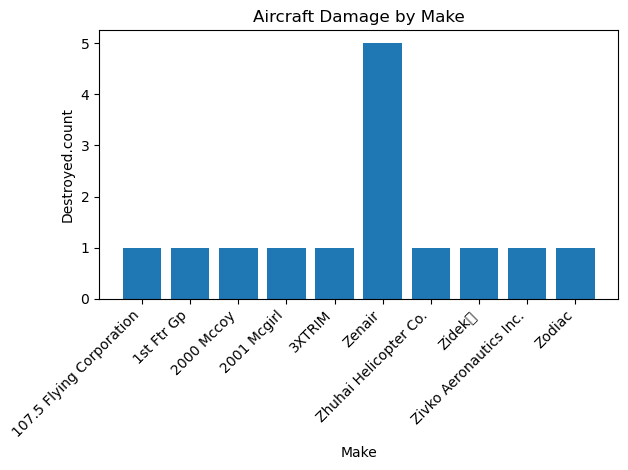

In [12]:
# visualize Make against Destroyed.counts
# Create a bar chart
plt.bar(makes, destroyed_counts)

# Add labels
plt.title('Aircraft Damage by Make')
plt.xlabel('Make')
plt.ylabel('Destroyed.count')

# Rotate x-axis for readability
plt.xticks(rotation=45, ha='right')
# Display the plot
plt.tight_layout()

# 2.Which make has had the most accidents whike which have the least:-

- First check to ensure data to know the values of 'Make' we are working with and their actual count.

In [13]:
df['Make'].value_counts()

Make
Cessna             22227
Piper              12029
CESSNA              4922
Beech               4330
PIPER               2841
                   ...  
Leonard Walters        1
Maule Air Inc.         1
Motley Vans            1
Perlick                1
ROYSE RALPH L          1
Name: count, Length: 8237, dtype: int64

From the .value_counts( ) output we can see our data is not uniform contains both uppercase and lowercase charactersv mixed up therefore some cleaning has to be done to make this uniform, we will make all characters lowercase using the command .lower( )


In [18]:
df['Make'] = df['Make'].str.lower()

In [14]:
df

,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition
0,Accident,1948-10-24,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,UNK
1,Accident,1962-07-19,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,UNK
2,Accident,1974-08-30,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,IMC
3,Accident,1977-06-19,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,IMC
4,Accident,1979-08-02,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...
88884,Accident,2022-12-26,Minor,NaN,NaN,PIPER,PA-28-151,No,NaN,NaN,Personal,NaN
88885,Accident,2022-12-26,NaN,NaN,NaN,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN
88886,Accident,2022-12-26,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,VMC
88887,Accident,2022-12-26,NaN,NaN,NaN,CESSNA,210N,No,NaN,NaN,Personal,NaN


Inspect for null values by running command *.isnull( ).sum( )* this will display all null values in the  'Make' column

In [15]:
df['Make'].isnull().sum()

63

Once null values are known they must be dropped inorder to make it easier to work with our relevant column['Make']  Values

In [16]:
df = df[df['Make'].notna()]
df['Make'].isna().sum()
df.head()

,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition
0,Accident,1948-10-24,Fatal(2),Destroyed,NaN,Stinson,108-3,No,1.0,Reciprocating,Personal,UNK
1,Accident,1962-07-19,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,1.0,Reciprocating,Personal,UNK
2,Accident,1974-08-30,Fatal(3),Destroyed,NaN,Cessna,172M,No,1.0,Reciprocating,Personal,IMC
3,Accident,1977-06-19,Fatal(2),Destroyed,NaN,Rockwell,112,No,1.0,Reciprocating,Personal,IMC
4,Accident,1979-08-02,Fatal(1),Destroyed,NaN,Cessna,501,No,NaN,NaN,Personal,VMC


In [17]:
df['Make']

0                           Stinson
1                             Piper
2                            Cessna
3                          Rockwell
4                            Cessna
                    ...            
88884                         PIPER
88885                      BELLANCA
88886    AMERICAN CHAMPION AIRCRAFT
88887                        CESSNA
88888                         PIPER
Name: Make, Length: 88826, dtype: object

checking to see if there are any remaining null values. *.info( )* will tell whether there is any null count

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88826 entries, 0 to 88888
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Investigation.Type  88826 non-null  object 
 1   Event.Date          88826 non-null  object 
 2   Injury.Severity     87843 non-null  object 
 3   Aircraft.damage     85650 non-null  object 
 4   Aircraft.Category   32275 non-null  object 
 5   Make                88826 non-null  object 
 6   Model               88777 non-null  object 
 7   Amateur.Built       88726 non-null  object 
 8   Number.of.Engines   82791 non-null  float64
 9   Engine.Type         81781 non-null  object 
 10  Purpose.of.flight   82676 non-null  object 
 11  Weather.Condition   84372 non-null  object 
dtypes: float64(1), object(11)
memory usage: 8.8+ MB


- After cleaning all Null values run *.groupby( )* to group the columns that we are analyzing, adding *.size( ).reset_index* to groupby command will initiate a new column with the specified name in this case we want to know the number of accidents so we will name the column Accident.count

In [19]:
make_with_most_accidents = df.groupby(['Make', 'Investigation.Type']).size().reset_index(name='Accident.Count')
make_with_most_accidents


,Make,Investigation.Type,Accident.Count
0,107.5 Flying Corporation,Accident,1
1,1200,Accident,1
2,177MF LLC,Accident,1
3,1977 Colfer-chan,Accident,1
4,1st Ftr Gp,Accident,1
...,...,...,...
8464,Zukowski,Accident,1
8465,Zwart,Accident,1
8466,de Havilland,Accident,9
8467,drone,Accident,1


- Sorting the values by 'ascending=false' will rearrange them and list the values in order from one with highest count to the lowest count. 

In [20]:
make_with_most_accidents.sort_values(by='Accident.Count', ascending=False)

,Make,Investigation.Type,Accident.Count
1632,Cessna,Accident,21973
5974,Piper,Accident,11885
1373,CESSNA,Accident,4820
973,Beech,Accident,4170
5784,PIPER,Accident,2799
...,...,...,...
3260,"Greenhaw, William",Accident,1
3259,Green-fowler,Accident,1
3258,Green Castle,Accident,1
3256,Greco Bruno,Accident,1


# Visualizing:-

From the cleaned data create new variables for 'Makes' and 'Accident.count' and assign them the  corresponding values from the columns that are in use
the new variable will offer relevant points for plotting.

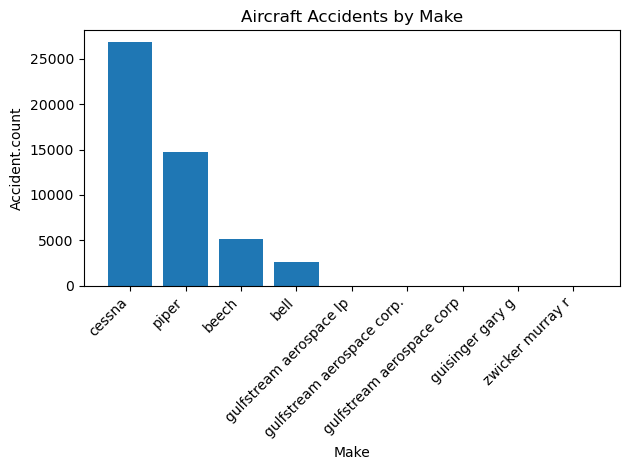

In [21]:
# visualize 'Make' against 'Accident.Count'
# Create variables for the list we are about to visualize

m_akes =['cessna',
         'piper',
         'beech',
         'bell',
         'gulfstream aerospace lp',
         'gulfstream aerospace corp.',
         'gulfstream aerospace corp',
         'guisinger gary g',
         'zwicker murray r'
]
Accident_count = [26793,14684,5177,2662,1,1,1,1,1]

# Create a bar graph to visualize the data
plt.bar(m_akes, Accident_count)

# Add labels
plt.title('Aircraft Accidents by Make')
plt.xlabel('Make')
plt.ylabel('Accident.count')

# Rotate x-axis for readability
plt.xticks(rotation=45, ha='right')
# Display the plot
plt.tight_layout()

As we can see from the data above Aircraft of the Make 'cessna ' has the highest number of Accidents by make while:- gulfstream aerospace lp, gulfstream aerospace corp.,
gulfstream aerospace corp, guisinger gary g, zwicker murray r are at lowest
we can visualize this data further  by stating index we want to visualize.

In [22]:
make_with_most_accidents[make_with_most_accidents['Investigation.Type']=='Accident'][:-550]
                                                                                    

,Make,Investigation.Type,Accident.Count
0,107.5 Flying Corporation,Accident,1
1,1200,Accident,1
2,177MF LLC,Accident,1
3,1977 Colfer-chan,Accident,1
4,1st Ftr Gp,Accident,1
...,...,...,...
7910,VIC TATELMAN,Accident,1
7911,VICKERS,Accident,2
7912,VICKERS-SLINGSBY,Accident,1
7913,VICTOR M CORDERO,Accident,1


N.B: For the values on th table above we can see accident count as only 1 for every Aircraft make, we therefore reshuffle the data such that th data is in descending order for better visualization purposes.

The data can easily be visualized now that all values are not 1.

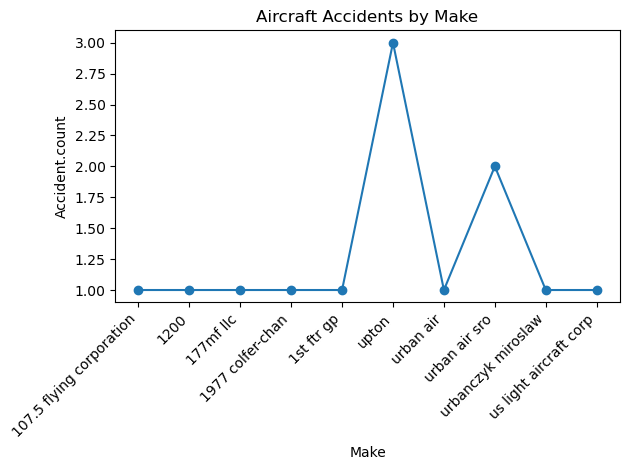

In [23]:
m_akes =['107.5 flying corporation',
         '1200',
         '177mf llc',
         '1977 colfer-chan',
         '1st ftr gp',
         'upton',
         'urban air',
         'urban air sro',
         'urbanczyk miroslaw',
         'us light aircraft corp',
]
Accident_count = [1,1,1,1,1,3,1,2,1,1]

# Create a bar graph to visualize the data
plt.plot(m_akes, Accident_count, marker='o')

# Add labels
plt.title('Aircraft Accidents by Make')
plt.xlabel('Make')
plt.ylabel('Accident.count')

# Rotate x-axis for readability
plt.xticks(rotation=45, ha='right')
# Display the plot
plt.tight_layout()
plt.show()

# 3.Take a look at comparing Make of the Aircraft to Purpose of flight to know which Aircraft were booked more for corporate Trips :

For this relationship columns to be used are 'Purpose.of.flight' and 'Make' for us to know the make of flight that went on more Executive/Corrporate flights

In [24]:
# .info() gives a preview of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 88826 entries, 0 to 88888
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Investigation.Type  88826 non-null  object 
 1   Event.Date          88826 non-null  object 
 2   Injury.Severity     87843 non-null  object 
 3   Aircraft.damage     85650 non-null  object 
 4   Aircraft.Category   32275 non-null  object 
 5   Make                88826 non-null  object 
 6   Model               88777 non-null  object 
 7   Amateur.Built       88726 non-null  object 
 8   Number.of.Engines   82791 non-null  float64
 9   Engine.Type         81781 non-null  object 
 10  Purpose.of.flight   82676 non-null  object 
 11  Weather.Condition   84372 non-null  object 
dtypes: float64(1), object(11)
memory usage: 8.8+ MB


Clean this column first as it contains alot of Null values which will lead to not receiving correct output if used without modifying and getting rid of the null values.

- For this use .isnull( ).sum( ) to view the total number of null values

In [25]:
# Look through to find null values 
df['Purpose.of.flight'].isnull().sum()

6150

Now that we know all our null values w ego ahead to drop them inorder to work with clean data
use .notna( ) or .dropna( ) in their correct parameters to eliminate the null values

In [26]:
#Eliminating null values .notna() function
df = df[df['Purpose.of.flight'].notna()]
df['Purpose.of.flight'].isna().sum()
df.tail()

,Investigation.Type,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,Number.of.Engines,Engine.Type,Purpose.of.flight,Weather.Condition
88882,Accident,2022-12-21,Minor,NaN,NaN,GRUMMAN AMERICAN AVN. CORP.,AA-5B,No,NaN,NaN,Instructional,NaN
88884,Accident,2022-12-26,Minor,NaN,NaN,PIPER,PA-28-151,No,NaN,NaN,Personal,NaN
88886,Accident,2022-12-26,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1.0,NaN,Personal,VMC
88887,Accident,2022-12-26,NaN,NaN,NaN,CESSNA,210N,No,NaN,NaN,Personal,NaN
88888,Accident,2022-12-29,Minor,NaN,NaN,PIPER,PA-24-260,No,NaN,NaN,Personal,NaN


- The column we are using in the data frame has been cleaned and null values eliminated

Run  the groupby ( ) function to group the columns that are relevant for this analysis that is 'Make' and 'purpose.of.flight assigning the group to a new variable created called: 'make_with_most_Eflights'

- By adding .size( ).reset_index( ) at the end of groupby the code creates a new column with the name specified, say in this case 'Executive/corporate.count

In [27]:
make_with_most_Eflights = df.groupby(['Make', 'Purpose.of.flight']).size().reset_index(name='Executive/corporate.count')
make_with_most_Eflights

,Make,Purpose.of.flight,Executive/corporate.count
0,107.5 Flying Corporation,Personal,1
1,1200,Personal,1
2,177MF LLC,Personal,1
3,1977 Colfer-chan,Personal,1
4,1st Ftr Gp,Personal,1
...,...,...,...
10217,Zwart,Personal,1
10218,de Havilland,Personal,2
10219,de Havilland,Positioning,2
10220,de Havilland,Skydiving,1


- sort the values to see from top count to the least count
use functon .sort_values specyfying count name and ascending= False

In [28]:
make_with_most_Eflights.sort_values(by='Executive/corporate.count', ascending=False)

,Make,Purpose.of.flight,Executive/corporate.count
2145,Cessna,Personal,13057
7315,Piper,Personal,7909
2143,Cessna,Instructional,4288
1802,CESSNA,Personal,2805
1300,Beech,Personal,2622
...,...,...,...
3985,Gatzemeyer 88,Personal,1
3984,Gates Learjet Corporation,Executive/corporate,1
3979,Gates Learjet,Other Work Use,1
3975,Gates Lear Jet,Executive/corporate,1


- The columns in Purpose.of.flight are not yet cleaned to display executive/corporate flights only


In [29]:
#randomly pick 20 to see with most Executive trips
make_with_most_Eflights[make_with_most_Eflights['Purpose.of.flight']=='Executive/corporate'][:20]

,Make,Purpose.of.flight,Executive/corporate.count
39,AERO COMMANDER,Executive/corporate,1
377,Aero Commander,Executive/corporate,3
440,Aerospatiale,Executive/corporate,10
493,Agusta,Executive/corporate,3
646,American Eurocopter,Executive/corporate,1
831,B??lkow,Executive/corporate,1
837,BAE,Executive/corporate,1
897,BEECH,Executive/corporate,7
925,BELL,Executive/corporate,5
946,BELL HELICOPTER TEXTRON,Executive/corporate,1


# Vizualize

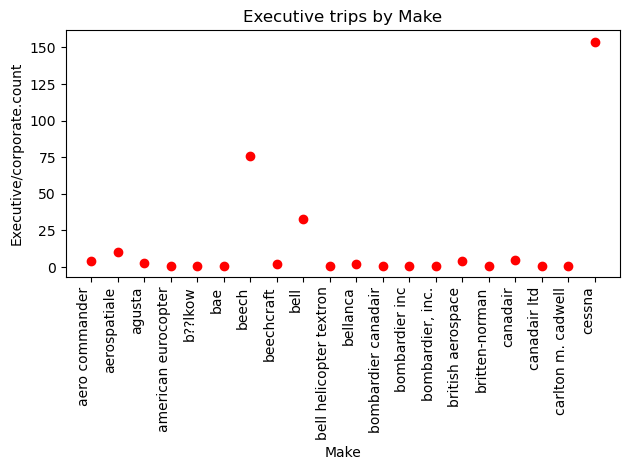

In [30]:
ma_kes =['aero commander',
          'aerospatiale',
          'agusta',
          'american eurocopter',
          'b??lkow',
          'bae',
          'beech',
          'beechcraft',
          'bell',
          'bell helicopter textron',
          'bellanca',
          'bombardier canadair',
          'bombardier inc',
          'bombardier, inc.',
          'british aerospace',
          'britten-norman',
          'canadair',
          'canadair ltd',
          'carlton m. cadwell',
          'cessna'
] 

Executive_count = [4, 10, 3, 1, 1, 1, 76, 2, 33, 1, 2, 1, 1, 1, 4, 1, 5, 1, 1, 154]
#visualize the data
#create a bargraph to show which Aircraft has most corporate flights
# Create a bar graph to visualize the data
plt.scatter(ma_kes, Executive_count, color='red')

# Add labels
plt.title('Executive trips by Make')
plt.xlabel('Make')
plt.ylabel('Executive/corporate.count')

# Rotate x-axis for readability
plt.xticks(rotation=90, ha='right')
# Display the plot
plt.tight_layout()
plt.show()

Finnally we can look through the data to compare:

#  4.Make with Injury Severity to tell the make with most fatalities

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 82676 entries, 0 to 88888
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Investigation.Type  82676 non-null  object 
 1   Event.Date          82676 non-null  object 
 2   Injury.Severity     82625 non-null  object 
 3   Aircraft.damage     81107 non-null  object 
 4   Aircraft.Category   27829 non-null  object 
 5   Make                82676 non-null  object 
 6   Model               82639 non-null  object 
 7   Amateur.Built       82642 non-null  object 
 8   Number.of.Engines   79548 non-null  float64
 9   Engine.Type         78935 non-null  object 
 10  Purpose.of.flight   82676 non-null  object 
 11  Weather.Condition   81534 non-null  object 
dtypes: float64(1), object(11)
memory usage: 8.2+ MB


- Create a variable the group 'Make' and 'Injury.Severity'. Variable name is: make_with_most_fatalities and assign the groupby( ) that was run first.

In [32]:
make_with_most_fatalities = df.groupby(['Make', 'Injury.Severity']).size().reset_index(name='Fatality.count')
make_with_most_fatalities

,Make,Injury.Severity,Fatality.count
0,107.5 Flying Corporation,Fatal(1),1
1,1200,Non-Fatal,1
2,177MF LLC,Non-Fatal,1
3,1977 Colfer-chan,Non-Fatal,1
4,1st Ftr Gp,Fatal(1),1
...,...,...,...
9765,Zorn,Fatal(1),1
9766,Zukowski,Non-Fatal,1
9767,Zwart,Non-Fatal,1
9768,de Havilland,Non-Fatal,5


Sort the values such that all values for counts are not equal to 1, use .sort_values()

In [33]:
make_with_most_fatalities.sort_values(by='Fatality.count', ascending=False)

,Make,Injury.Severity,Fatality.count
1978,Cessna,Non-Fatal,18090
6915,Piper,Non-Fatal,9246
1670,CESSNA,Non-Fatal,3488
1153,Beech,Non-Fatal,2876
6689,PIPER,Non-Fatal,2007
...,...,...,...
3749,Gilbert,Fatal(2),1
3748,Gift,Fatal(2),1
3747,Gifford,Non-Fatal,1
3746,Giertz,Fatal(1),1


- The fatality.count has been arranged in order from one with most to the leaast fatality counts but the Injury.Severity column still has mixed fata and non fatal , we change this by running command which highlights only fatalities. Output generated will show a random list with Fatality count

In [34]:
make_with_most_fatalities[make_with_most_fatalities['Injury.Severity']=='Fatal'][:20]

,Make,Injury.Severity,Fatality.count
29,ADAMS DONALD L,Fatal,1
33,AERO ADVENTURE,Fatal,1
35,AERO COMMANDER,Fatal,16
38,AERO SP Z O O,Fatal,1
40,AERO TEK INC.,Fatal,1
41,AERO VODOCHODY,Fatal,6
44,AEROFAB INC,Fatal,1
45,AEROFAB INC.,Fatal,1
47,AERONCA,Fatal,16
51,AEROPRAKT,Fatal,1


# Jump into visualizing :

- For this data we can use  scatter plot to visualize :

From previous trials the process is the same, a list of values to give plotting points for both X & Y axis is first created and assigned new variable names

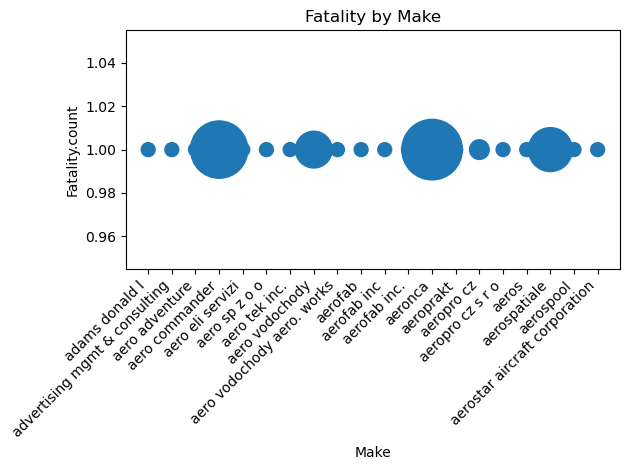

In [35]:
make_s = ['adams donald l',
          'advertising mgmt & consulting',
          'aero adventure',
          'aero commander',
          'aero eli servizi',
          'aero sp z o o',
          'aero tek inc.',
          'aero vodochody',
          'aero vodochody aero. works',
          'aerofab',
          'aerofab inc',
          'aerofab inc.',
          'aeronca',
          'aeroprakt',
          'aeropro cz',
          'aeropro cz s r o',
          'aeros',
          'aerospatiale',
          'aerospool',
          'aerostar aircraft corporation'
]

fatality_count = [1,1,1,17,1,1,1,7,1,1,1,1,19,1,2,1,1,10,1,1]

#  create a new variable and assign numerical values to each 'Make' in make_s
make_s_indx = range(len(make_s))
# Create a bubble plot with the info
plt.scatter(make_s_indx, [1]*len(make_s), s=[i*100 for i in fatality_count])
# title and labels
plt.title('Fatality by Make')
plt.xlabel('Make')
plt.ylabel('Fatality.count')
plt.xticks(make_s_indx, make_s, rotation=45, ha='right')
#Show the plot
plt.tight_layout()
plt.show()

From the analysis mad e on this data it is evident that  Plane make 'Cessna' has the most accidents at the same time has the most Executive/corporate flights
hence it is correct to say Cessna is the most popular Airplane, but trickling down to safety and Fatalities lesser popular brands have lower fatalities and accident count, as well as a reputable number of Business and Corporate flies.
view visualizations for clearer results and comparisons..

- N.B : Visualizations differ in makes due to random picking of data to analyze when running Code.

# *The End.*